<ipython-input-8-bb0bd37890e1>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(x, y, Label = 'Data')


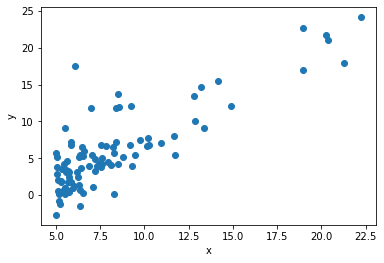

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

# Read file
x, y = np.loadtxt('data2.txt', delimiter=',', unpack=True)
plt.scatter(x, y, Label = 'Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# parameters setup
x = np.c_[np.ones((len(x), )), x]
np.reshape(x, (len(x), 2))
np.reshape(y, (len(y), 1))

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#gradient
def getTheta(x_data, y_data, iterations, m, eta):
    theta = np.random.randn(2,1)
    for iteration in range(iterations):
        gradients = 2/m * x_data.T.dot(x_data.dot(theta) - y_data.reshape(len(y_data),1))
        theta = theta - eta * gradients
    return theta

def getStocTheta(x_data, y_data, m, eta):
    theta = np.random.randn(2,1)
    thetas = np.array([])
    for epoch in range(50):
        for i in range(m):
            random_index = np.random.randint(len(x_data))
            xi = x_data[random_index:random_index+1]
            yi = y_data[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi.reshape(len(y_data),1))
            eta = learning_schedule(epoch * m + i, m)
            theta = theta - eta * gradients
        thetas = np.append(thetas, theta)
    return theta

# batch
def getMSEchange(x_data, y_data, iterations, m, eta):
    msePrime = np.array([])
    theta = np.random.randn(2,1)
    for iteration in range(iterations):
        mse = np.square(np.subtract(y_data.reshape(len(y_data),1), x_data.dot(theta))).mean()       
        msePrime = np.append(msePrime, mse)
        gradients = 2/m * x_data.T.dot(x_data.dot(theta) - y_data.reshape(len(y_data),1))
        theta = theta - eta * gradients
    return msePrime
        
# Stochastic
def learning_schedule(t, t1):
    return 1 / (t + t1)

def getRandomMSE(x_data, y_data, m, eta):
    t1 = m
    mse = 0
    theta = np.random.randn(2,1)
    y_MSE = np.array([])
    for epoch in range(50):
        for i in range(m):
            random_index = np.random.randint(len(x_data))
            xi = x_data[random_index:random_index+1]
            yi = y_data[random_index:random_index+1]
            mse += np.square(np.subtract(yi, xi.dot(theta))).mean()
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi.reshape(-1,1))
            eta = learning_schedule(epoch * m + i, t1)
            theta = theta - eta * gradients
        y_MSE = np.append(y_MSE, mse / m)
        if y_MSE.any() < 0.00001:
            return y_MSE
    return y_MSE

# MSEs of each mode on training set, then test set vs. learning rate
def getMSEbatch(x_data, y_data, learningRates):
    mses = np.array([])
    for rates in range(len(learningRates)):
        mses = np.append(mses, getMSEchange(x_data, y_data, 1000, len(x_data), rates / 100).min())
    return mses

def getMSEstoc(x_data, y_data, learningRates):
    mses = np.array([])
    for rates in range(len(learningRates)):
        mses = np.append(mses, getRandomMSE(x_data, y_data, len(x_data), rates / 100).min())
    return learningRates

In [9]:
y = np.reshape(y, (97,1))
theta_best = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta_best

array([[-3.89578088],
       [ 1.19303364]])

[[-1.3390057]
 [ 0.922211 ]]


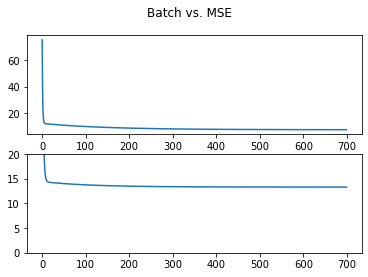

In [10]:
# batch iteration vs. MSE
np.reshape(y_train, (len(y_train), 1))
msePrime = getMSEchange(x_train, y_train, 700, len(x_train), 0.01)
x_iter = np.arange(700)

np.reshape(y_test, (len(y_test), 1))
msePrimeT = getMSEchange(x_test, y_test, 700, len(x_test), 0.01)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Batch vs. MSE')
ax1.plot(x_iter, msePrime)
ax2.plot(x_iter, msePrimeT)
plt.ylim([0,20])
print(getTheta(x_test, y_test, 700, 77, 0.02))

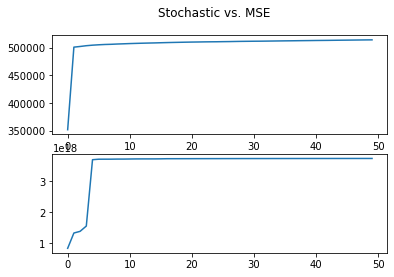

In [11]:
# stochastic vs. MSE
np.reshape(y_train, (len(y_train), 1))
msePrime = getRandomMSE(x_train, y_train, len(x_train), 0.01)
x_iter = np.arange(50)

np.reshape(y_test, (len(y_test), 1))
msePrimeT = getRandomMSE(x_test, y_test, len(x_test), 0.01)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Stochastic vs. MSE')
ax1.plot(x_iter, msePrime)
ax2.plot(x_iter, msePrimeT)

C:\Users\jphwa\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-8-bb0bd37890e1>:50: RuntimeWarning: overflow encountered in square
  mse = np.square(np.subtract(y_data.reshape(len(y_data),1), x_data.dot(theta))).mean()
<ipython-input-8-bb0bd37890e1>:53: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients
<ipython-input-8-bb0bd37890e1>:50: RuntimeWarning: overflow encountered in square
  mse = np.square(np.subtract(y_data.reshape(len(y_data),1), x_data.dot(theta))).mean()
C:\Users\jphwa\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-8-bb0bd37890e1>:53: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


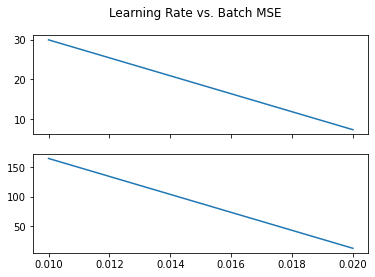

In [12]:
learningRates = np.arange(0.01, 0.11, 0.01)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Learning Rate vs. Batch MSE')
ax1.plot(learningRates, getMSEbatch(x_train, y_train, learningRates))
ax2.plot(learningRates, getMSEbatch(x_test, y_test, learningRates))

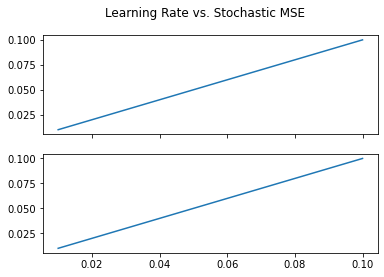

In [13]:
learningRates = np.arange(0.01, 0.11, 0.01)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Learning Rate vs. Stochastic MSE')
ax1.plot(learningRates, getMSEstoc(x_train, y_train, learningRates))
ax2.plot(learningRates, getMSEstoc(x_test, y_test, learningRates))